In [66]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = True


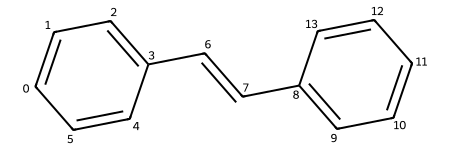

In [50]:
# A single molecule can be drawn easily
# Here we show t-stilbene from it's SMILES code
molGood = Chem.MolFromSmiles("C1=CC=C(C=C1)C=CC2=CC=C(C=C2)")
molGood

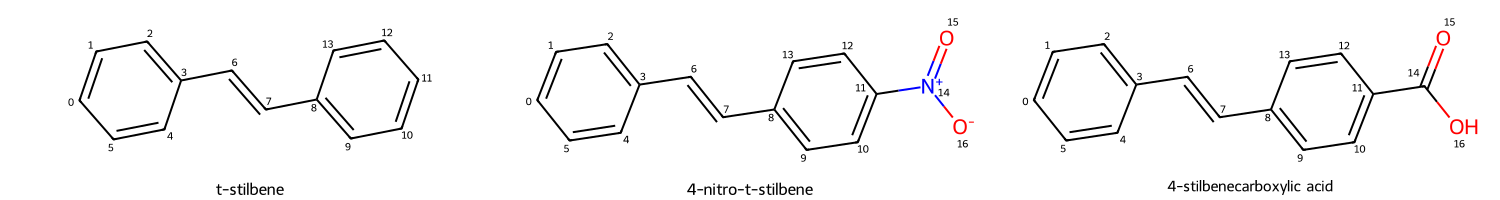

In [51]:
#You can show multiple molecules to contrast them
#Test in an example of hypervalent nitrogen analog of a potentially good DM detection target as well as a random carboxylic acid derivative
molBad = Chem.MolFromSmiles("C1=CC=C(C=C1)C=CC2=CC=C(C=C2)[N+](=O)[O-]")
molOK = Chem.MolFromSmiles("C1=CC=C(C=C1)C=CC2=CC=C(C=C2)[C](=O)[OH]")
ms = [molGood,molBad,molOK]

# Draw Them
Draw.MolsToGridImage(ms,subImgSize=(500,200),legends=('t-stilbene','4-nitro-t-stilbene','4-stilbenecarboxylic acid'))




## Molecular Similarity ##

refs:
1. [Textbook chemical similarity & descriptors](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/06%3A_Molecular_Similarity/6.01%3A_Molecular_Descriptors#_ENREF_25)

1. [Blog post about Tanimoto](https://www.featurebase.com/blog/tanimoto-similarity-in-featurebase)


2. [RD-kit tutorial about chemical similarity](http://rdkit.org/docs/GettingStartedInPython.html#fingerprinting-and-molecular-similarity)



In chemical informatics, we can derive a measure of similarity between two molecules A and B. We first form the set of ***fingerprint bits*** which deconstruct the molecules into substructures. These sets are A* and B*.  We can then compare their fingerprints. 

The Tanimoto coefficient, T(A,B), is calculated as the ratio of the intersection of A* and B* to the union of A* and B*. This metric is 0 if the molecules dont share any common fingerprint bits (i.e. absolutely no common substructure) and converges to 1 if A* = B*, in which case the molecules are identical. 

# fingerprint bits #

Here, rdkit is using the most common fingerprint generation scheme known as the Daylight fingerprint (see ref. 1). This is a fingerprinting method wherein the substructures are generated by enumerating all possible paths starting from a given atom and assigning a bit to each path.  

0.765625


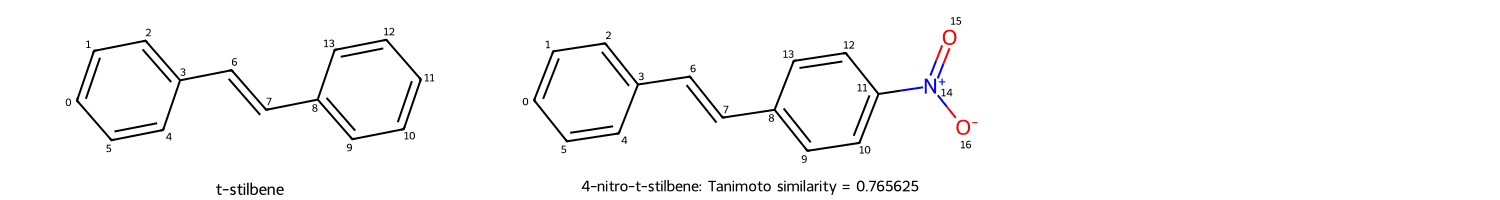

In [65]:
from rdkit.Chem import rdFingerprintGenerator
#create fingerprint generator
fpgen = rdFingerprintGenerator.GetRDKitFPGenerator(fpSize=64)

#Fingerprint our molecules
fps = [fpgen.GetFingerprint(x) for x in ms]

#Compute the Tanimoto similarity between t-stilbene and the other two analogs
sim=DataStructs.TanimotoSimilarity(fps[0],fps[1])
print(sim)
Draw.MolsToGridImage(ms[0:2],subImgSize=(500,200),legends=('t-stilbene',f'4-nitro-t-stilbene: Tanimoto similarity = {sim}'))